# Завдання 2
Використовуючи дані із файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.

Завантаження пакетів та даних:

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

petrol = pd.read_csv('petrol_consumption.csv')

petrol.columns = ['tax',
                  'income',
                  'highways',
                  'pdl',
                  'consumption']
petrol.head()

,tax,income,highways,pdl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Візуалізація даних:

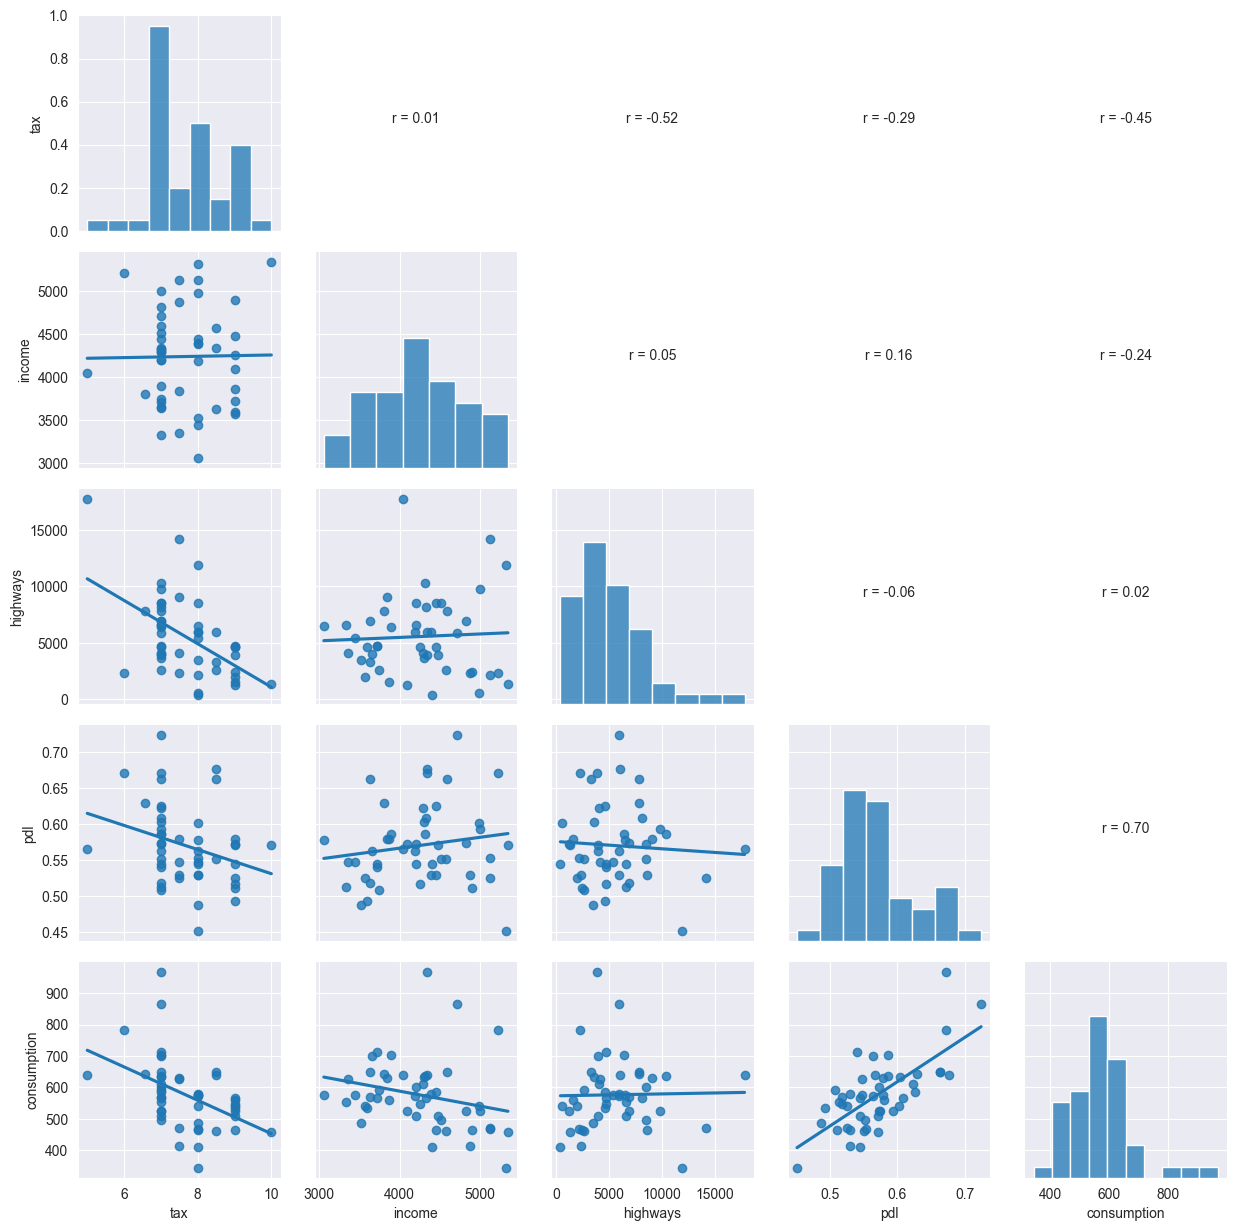

In [65]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(petrol)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot, ci=False)
g.map_upper(reg_coef)

Побудова моделі множинної лінійної регресії:

In [66]:
X = petrol.drop('consumption', axis=1)
y = petrol['consumption']

reg = LinearRegression().fit(X, y)

print(f'Рівняння регресії: Consumption = {round(reg.intercept_, 2)} {round(reg.coef_[0],2)}*TAX {round(reg.coef_[1],2)}*INCOME {round(reg.coef_[2],3)}*HIGHWAYS +{round(reg.coef_[3],2)}*PDL')

Рівняння регресії: Consumption = 377.29 -34.79*TAX -0.07*INCOME -0.002*HIGHWAYS +1336.45*PDL


Варіант через statsmodels:

In [67]:
import statsmodels.formula.api as smf

all_columns = "+".join(petrol.columns.difference(["consumption"]))
my_formula = "consumption~" + all_columns

sm_fit = smf.ols(formula=my_formula, data=petrol).fit()
sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           3.91e-10
Time:                        15:47:35   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    377.2911    185.541      2.033      0.048       3.112     751.471
highways      -0.0024      0.003     -0.716      0.478      -0.009       0.004
income        -0.0666      0.017     -3.867      0.000      -0.101      -0.032
pdl         1336.4494    192.298      6.950      0.000     948.643    1724.256
tax          -34.7901     12.970     -2.682      0.010     -60.947      -8.633
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модельні значення:

In [68]:
petrol['consumption fitted'] = reg.predict(X)
petrol.head()

,tax,income,highways,pdl,consumption,consumption fitted
0,9.0,3571,1976,0.525,541,523.233727
1,9.0,4092,1250,0.572,524,553.115303
2,9.0,3865,1586,0.580,561,578.107446
3,7.5,4870,2351,0.529,414,493.356252
4,8.0,4399,431,0.544,410,532.028926


Оцінювання ефективності:

In [69]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mape=metrics.mean_absolute_percentage_error(y_true, y_pred)*100

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE: ', round(mape,4))

regression_results(petrol['consumption'], petrol['consumption fitted'])

r2:  0.6787
MAE:  48.7775
MSE:  3938.541
RMSE:  62.7578
MAPE:  8.3419


### Висновок:
1. З точки зору пояснювальної сили, наша модель містить неефективні параметри моделі по змінній *Income*. Слід використати регуляризацію.
2. Скоріш за все присутнє явище мультиколінеарності - тісний лінійний взаємозв'язок між змінними. Це може негативно вплинути на пояснювальну силу моделі. Але якщо нам важлива тільки предиктивна сила - можемо знехтувати цим явищем.
3. З точки зору предиктивної сили, модель складно оцінити за показниками точності, оскільки не будо використано розбиття на тестову та навчальну вибірки або не будо використано крос-валідацію. Тож модель може містити явище "перенавчання" (overfitting) і довіряти таким прогнозам я б не став.